# Stock Prediction using Random model

In [61]:
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas_datareader as web
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import sklearn, math

# Stock Prediction for Nokia

In [95]:
# Reading the "Nokia" stock data from webreader

data = web.DataReader('NOK', 'yahoo', start="2000-01-01", end="2021-10-13")
data.to_csv("D:/DSMT Assignments/Assignment4/Nokia.xlsx")

Text(0.5, 1.0, 'Nokia Stock price')

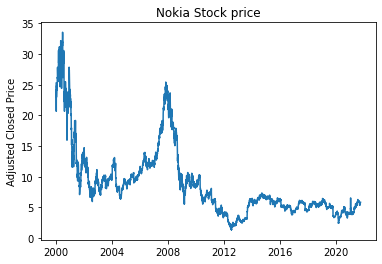

In [93]:
# Plotting the data and reading the performance as how it has performed in last years
plt.plot(data['Adj Close'])
plt.ylabel("Adjusted Closed Price")
plt.title("Nokia Stock price")

In [43]:
# Reseting the index
data = data.reset_index()
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,48.250000,45.5000,48.125000,46.75,20275200.0,25.261274
1,2000-01-04,45.140625,43.1875,44.250000,43.25,19410000.0,23.370052
2,2000-01-05,43.625000,40.1875,42.046875,42.50,25034000.0,22.964794
3,2000-01-06,42.750000,38.2500,42.000000,38.25,19321600.0,20.668314
4,2000-01-07,43.000000,40.4375,40.437500,42.75,18058800.0,23.099880
...,...,...,...,...,...,...,...
5476,2021-10-07,5.800000,5.7100,5.720000,5.77,16933400.0,5.770000
5477,2021-10-08,5.880000,5.7800,5.850000,5.80,16089500.0,5.800000
5478,2021-10-11,5.850000,5.7600,5.780000,5.80,12405100.0,5.800000
5479,2021-10-12,5.850000,5.7800,5.830000,5.80,17008300.0,5.800000


In [44]:
# Target value considered in a vector
y = data['Adj Close']
y

0       25.261274
1       23.370052
2       22.964794
3       20.668314
4       23.099880
          ...    
5476     5.770000
5477     5.800000
5478     5.800000
5479     5.800000
5480     5.840000
Name: Adj Close, Length: 5481, dtype: float64

In [45]:
# Droping the columns from the predictor variables
X = data.drop(columns = ['Adj Close','Date'])
X

,High,Low,Open,Close,Volume
0,48.250000,45.5000,48.125000,46.75,20275200.0
1,45.140625,43.1875,44.250000,43.25,19410000.0
2,43.625000,40.1875,42.046875,42.50,25034000.0
3,42.750000,38.2500,42.000000,38.25,19321600.0
4,43.000000,40.4375,40.437500,42.75,18058800.0
...,...,...,...,...,...
5476,5.800000,5.7100,5.720000,5.77,16933400.0
5477,5.880000,5.7800,5.850000,5.80,16089500.0
5478,5.850000,5.7600,5.780000,5.80,12405100.0
5479,5.850000,5.7800,5.830000,5.80,17008300.0


In [46]:
# Conisdering for the 100 days
X = X.iloc[0:-100]
y = y.shift(-100).dropna()
X,y

(           High      Low       Open  Close      Volume
 0     48.250000  45.5000  48.125000  46.75  20275200.0
 1     45.140625  43.1875  44.250000  43.25  19410000.0
 2     43.625000  40.1875  42.046875  42.50  25034000.0
 3     42.750000  38.2500  42.000000  38.25  19321600.0
 4     43.000000  40.4375  40.437500  42.75  18058800.0
 ...         ...      ...        ...    ...         ...
 5376   4.930000   4.8600   4.880000   4.91  21961100.0
 5377   5.070000   4.9500   4.990000   4.98  43302500.0
 5378   4.970000   4.8900   4.900000   4.94  27387100.0
 5379   5.150000   4.9400   4.950000   5.15  49555700.0
 5380   5.160000   5.0400   5.150000   5.05  38946200.0
 
 [5381 rows x 5 columns],
 0       25.485620
 1       26.027868
 2       27.925730
 3       28.196857
 4       30.603071
           ...    
 5376     5.770000
 5377     5.800000
 5378     5.800000
 5379     5.800000
 5380     5.840000
 Name: Adj Close, Length: 5381, dtype: float64)

In [49]:
# Splitting the data in training and test data for modeling and predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is bad)
rf_model.score(X_test, y_test)

0.8375347506338363

In [57]:
y_pred = rf_model.predict(X_test)
y_pred = list(y_pred)

In [63]:
# Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data.
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)
rmse

2.099276397196057

#### Conclusion :
As we can see that R2 measure for the above model is coming around 0.83 , the more the value closer to 1 the better it is. But it maybe possible that model was being overfitted as in earlier test cases it was coming around 0.99 which is practically impossible.
RMSE value is 2.099 which is good but looking at stock prediction analysis it maybe large.

# Stock prediction for AAL

In [96]:
# Reading the "AAL" stock data from webreader

data = web.DataReader('AAL', 'yahoo', start="2000-01-01", end="2021-10-13")
data.to_csv("D:/DSMT Assignments/Assignment4/AAL.xlsx")

Text(0.5, 1.0, 'AAL Stock price')

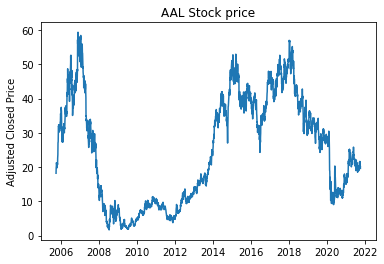

In [97]:
# Plotting the data and reading the performance as how it has performed in last years
plt.plot(data['Adj Close'])
plt.ylabel("Adjusted Closed Price")
plt.title("AAL Stock price")

In [98]:
# Reseting the index
data = data.reset_index()
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194906
1,2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199
2,2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052805
3,2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806997
4,2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268944
...,...,...,...,...,...,...,...
4035,2021-10-07,20.900000,20.080000,20.840000,20.170000,29167200.0,20.170000
4036,2021-10-08,20.290001,19.879999,20.240000,20.070000,21634900.0,20.070000
4037,2021-10-11,20.510000,19.850000,19.980000,20.129999,23646800.0,20.129999
4038,2021-10-12,20.400000,20.030001,20.200001,20.290001,18448400.0,20.290001


In [99]:
# Target value considered in a vector
y = data['Adj Close']
y

0       18.194906
1       19.326199
2       19.052805
3       19.806997
4       20.268944
          ...    
4035    20.170000
4036    20.070000
4037    20.129999
4038    20.290001
4039    19.610001
Name: Adj Close, Length: 4040, dtype: float64

In [100]:
# Droping the columns from the predictor variables
X = data.drop(columns = ['Adj Close','Date'])
X

,High,Low,Open,Close,Volume
0,21.400000,19.100000,21.049999,19.299999,961200.0
1,20.530001,19.200001,19.299999,20.500000,5747900.0
2,20.580000,20.100000,20.400000,20.209999,1078200.0
3,21.049999,20.180000,20.260000,21.010000,3123300.0
4,21.750000,20.900000,20.900000,21.500000,1057900.0
...,...,...,...,...,...
4035,20.900000,20.080000,20.840000,20.170000,29167200.0
4036,20.290001,19.879999,20.240000,20.070000,21634900.0
4037,20.510000,19.850000,19.980000,20.129999,23646800.0
4038,20.400000,20.030001,20.200001,20.290001,18448400.0


In [101]:
# Conisdering for the 100 days
X = X.iloc[0:-100]
y = y.shift(-100).dropna()
X,y

(           High        Low       Open      Close      Volume
 0     21.400000  19.100000  21.049999  19.299999    961200.0
 1     20.530001  19.200001  19.299999  20.500000   5747900.0
 2     20.580000  20.100000  20.400000  20.209999   1078200.0
 3     21.049999  20.180000  20.260000  21.010000   3123300.0
 4     21.750000  20.900000  20.900000  21.500000   1057900.0
 ...         ...        ...        ...        ...         ...
 3935  23.400000  22.100000  22.320000  23.350000  40716100.0
 3936  23.940001  23.080000  23.540001  23.559999  38662400.0
 3937  23.270000  22.620001  22.969999  22.969999  34558200.0
 3938  23.180000  22.290001  23.180000  22.600000  33606500.0
 3939  23.040001  22.510000  22.709999  22.570000  26246500.0
 
 [3940 rows x 5 columns],
 0       30.639103
 1       31.713821
 2       32.666000
 3       31.600689
 4       31.440434
           ...    
 3935    20.170000
 3936    20.070000
 3937    20.129999
 3938    20.290001
 3939    19.610001
 Name: Adj Close, L

In [102]:
# Splitting the data in training and test data for modeling and predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [103]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [104]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is bad)
rf_model.score(X_test, y_test)

0.8552962151752854

In [105]:
y_pred = rf_model.predict(X_test)
y_pred = list(y_pred)

In [106]:
# Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data.
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)
rmse

5.951949331319347

#### Conclusion :
For the stock AAL, same steps were followed as for Nokia. But here we can see that R2 value is 0.85 and RMSE increased to 5.95.

# Stock prediction for FedEx

In [116]:
# Reading the "AAL" stock data from webreader

data = web.DataReader('FDX', 'yahoo', start="2000-01-01", end="2021-10-13")
data.to_csv("D:/DSMT Assignments/Assignment4/FDX.xlsx")

Text(0.5, 1.0, 'FDX Stock price')

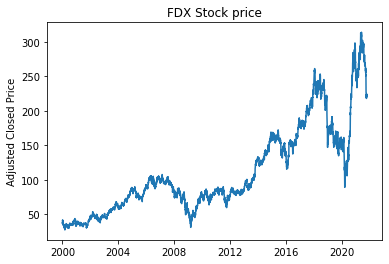

In [117]:
# Plotting the data and reading the performance as how it has performed in last years
plt.plot(data['Adj Close'])
plt.ylabel("Adjusted Closed Price")
plt.title("FDX Stock price")

In [118]:
# Reseting the index
data = data.reset_index()
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,43.625000,41.000000,42.375000,42.937500,1734000.0,37.550232
1,2000-01-04,43.187500,41.000000,42.500000,41.500000,1571900.0,36.293102
2,2000-01-05,43.250000,41.375000,41.875000,42.437500,2239400.0,37.112968
3,2000-01-06,47.312500,42.437500,42.500000,47.250000,4630500.0,41.321655
4,2000-01-07,47.500000,44.250000,47.250000,47.500000,3532800.0,41.540291
...,...,...,...,...,...,...,...
5476,2021-10-07,227.660004,222.479996,227.000000,222.949997,3954100.0,222.949997
5477,2021-10-08,223.940002,221.419998,222.399994,223.440002,2364600.0,223.440002
5478,2021-10-11,224.580002,219.360001,224.029999,219.820007,2884700.0,219.820007
5479,2021-10-12,222.080002,219.679993,219.820007,221.320007,2541500.0,221.320007


In [119]:
# Target value considered in a vector
y = data['Adj Close']
y

0        37.550232
1        36.293102
2        37.112968
3        41.321655
4        41.540291
           ...    
5476    222.949997
5477    223.440002
5478    219.820007
5479    221.320007
5480    223.729996
Name: Adj Close, Length: 5481, dtype: float64

In [120]:
# Droping the columns from the predictor variables
X = data.drop(columns = ['Adj Close','Date'])
X

,High,Low,Open,Close,Volume
0,43.625000,41.000000,42.375000,42.937500,1734000.0
1,43.187500,41.000000,42.500000,41.500000,1571900.0
2,43.250000,41.375000,41.875000,42.437500,2239400.0
3,47.312500,42.437500,42.500000,47.250000,4630500.0
4,47.500000,44.250000,47.250000,47.500000,3532800.0
...,...,...,...,...,...
5476,227.660004,222.479996,227.000000,222.949997,3954100.0
5477,223.940002,221.419998,222.399994,223.440002,2364600.0
5478,224.580002,219.360001,224.029999,219.820007,2884700.0
5479,222.080002,219.679993,219.820007,221.320007,2541500.0


In [121]:
# Conisdering for the 100 days
X = X.iloc[0:-100]
y = y.shift(-100).dropna()
X,y

(            High         Low        Open       Close     Volume
 0      43.625000   41.000000   42.375000   42.937500  1734000.0
 1      43.187500   41.000000   42.500000   41.500000  1571900.0
 2      43.250000   41.375000   41.875000   42.437500  2239400.0
 3      47.312500   42.437500   42.500000   47.250000  4630500.0
 4      47.500000   44.250000   47.250000   47.500000  3532800.0
 ...          ...         ...         ...         ...        ...
 5376  311.559998  306.679993  310.000000  309.260010   940700.0
 5377  310.279999  306.049988  309.690002  306.049988  1046100.0
 5378  308.429993  299.910004  304.000000  307.929993  1734700.0
 5379  311.950012  306.760010  309.140015  309.049988  1278100.0
 5380  315.290009  309.390015  310.429993  309.600006  1753600.0
 
 [5381 rows x 5 columns],
 0        30.772602
 1        29.570133
 2        31.045895
 3        31.045895
 4        31.209867
            ...    
 5376    222.949997
 5377    223.440002
 5378    219.820007
 5379    221

In [122]:
# Splitting the data in training and test data for modeling and predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [123]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [124]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is bad)
rf_model.score(X_test, y_test)

0.889288639497829

In [125]:
y_pred = rf_model.predict(X_test)
y_pred = list(y_pred)

In [126]:
# Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data.
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)
rmse

22.10230069632753

# Conclusion
We trained the model for 3 different stocks and accuracy and RMSE value varied differently. Definitely RandomForest Regressor is a good way to predict many targets, but considering time series, In my perspective and research I found LSTM (Long Short Term memory) to be more efficient and accurate.